## Data Importation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pitching = pd.read_csv("Pitching.csv")
batting = pd.read_csv("Batting.csv")
hof = pd.read_csv("HallOfFame.csv")

In [3]:
batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [4]:
pitching.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [5]:
hof.columns

Index(['playerID', 'yearid', 'votedBy', 'ballots', 'needed', 'votes',
       'inducted', 'category', 'needed_note'],
      dtype='object')

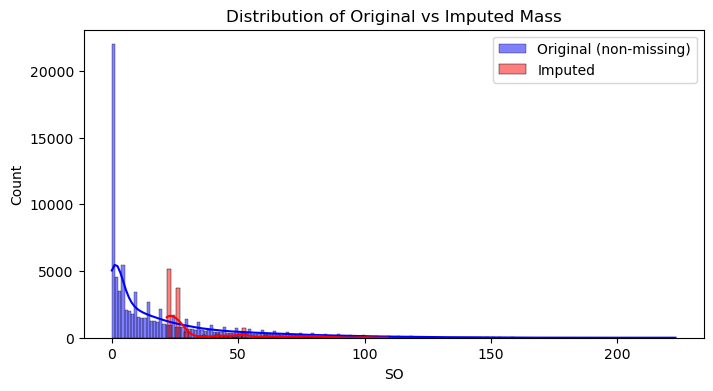


Original data statistics:
count    88345.000000
mean        21.629849
std         28.432978
min          0.000000
25%          2.000000
50%         10.000000
75%         30.000000
max        223.000000
Name: SO, dtype: float64

Imputed data statistics:
count    101332.000000
mean         23.228983
std          27.702258
min           0.000000
25%           2.000000
50%          15.000000
75%          31.000000
max         223.000000
Name: SO, dtype: float64


In [6]:
#ADAPTED FROM ICA WEEK 6
selected_columns = ["SB", "SO"]
batting_numeric = batting[selected_columns]

# split the data into a set with missing values and a set without
batting_with_missing = batting_numeric[batting_numeric.isnull().any(axis=1)]
batting_without_missing = batting_numeric.dropna()

# prepare the data for KNN imputation
scaler = StandardScaler()
batting_scaled = pd.DataFrame(scaler.fit_transform(batting_without_missing), columns=batting_without_missing.columns)

# initialize and fit KNN imputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(batting_scaled)

# function to impute and inverse transform the data
def impute_and_inverse_transform(data):
    # Ensure 'data' is always a DataFrame with proper column names
    scaled_data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)
    imputed_scaled = imputer.transform(scaled_data)
    return pd.DataFrame(scaler.inverse_transform(imputed_scaled), columns=data.columns, index=data.index)

# impute missing values
batting_imputed = impute_and_inverse_transform(batting_numeric)

# compare original and imputed data for a specific column (e.g., 'mass')
plt.figure(figsize=(8, 4))
sns.histplot(batting_numeric['SO'].dropna(), kde=True, color='blue', alpha=0.5, label='Original (non-missing)')
sns.histplot(batting_imputed.loc[batting_numeric['SO'].isnull(), 'SO'], kde=True, color='red', alpha=0.5, label='Imputed')
plt.title('Distribution of Original vs Imputed Mass')
plt.legend()
plt.show()

# print some statistics
print("\nOriginal data statistics:")
print(batting_numeric['SO'].describe())
print("\nImputed data statistics:")
print(batting_imputed['SO'].describe())

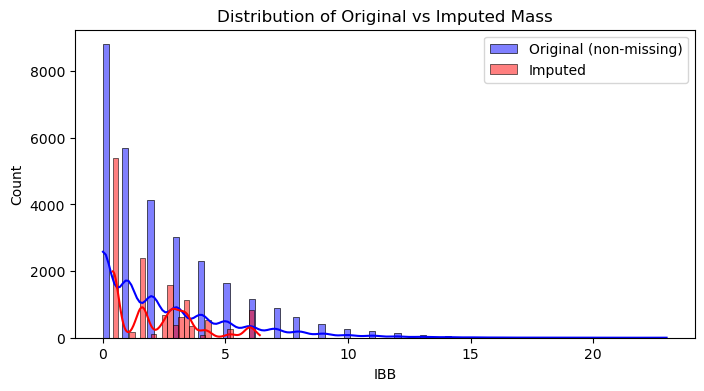


Original data statistics:
count    29564.000000
mean         2.447064
std          2.792671
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         23.000000
Name: IBB, dtype: float64

Imputed data statistics:
count    44139.000000
mean         2.314704
std          2.477814
min          0.000000
25%          0.400000
50%          1.600000
75%          3.400000
max         23.000000
Name: IBB, dtype: float64


In [8]:
#ADAPTED FROM ICA WEEK 6
selected_columns = ["IBB", "HBP"]
pitching_numeric = pitching[selected_columns]

# split the data into a set with missing values and a set without
pitching_with_missing = pitching_numeric[pitching_numeric.isnull().any(axis=1)]
pitching_without_missing = pitching_numeric.dropna()

# prepare the data for KNN imputation
scaler = StandardScaler()
pitching_scaled = pd.DataFrame(scaler.fit_transform(pitching_without_missing), columns=pitching_without_missing.columns)

# initialize and fit KNN imputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(pitching_scaled)

# function to impute and inverse transform the data
def impute_and_inverse_transform(data):
    # Ensure 'data' is always a DataFrame with proper column names
    scaled_data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)
    imputed_scaled = imputer.transform(scaled_data)
    return pd.DataFrame(scaler.inverse_transform(imputed_scaled), columns=data.columns, index=data.index)

# impute missing values
pitching_imputed = impute_and_inverse_transform(pitching_numeric)

# compare original and imputed data for a specific column (e.g., 'mass')
plt.figure(figsize=(8, 4))
sns.histplot(pitching_numeric['IBB'].dropna(), kde=True, color='blue', alpha=0.5, label='Original (non-missing)')
sns.histplot(pitching_imputed.loc[pitching_numeric['IBB'].isnull(), 'IBB'], kde=True, color='red', alpha=0.5, label='Imputed')
plt.title('Distribution of Original vs Imputed Mass')
plt.legend()
plt.show()

# print some statistics
print("\nOriginal data statistics:")
print(pitching_numeric['IBB'].describe())
print("\nImputed data statistics:")
print(pitching_imputed['IBB'].describe())

In [10]:
batting["SB"] = batting_imputed["SB"]
batting["SO"] = batting_imputed["SO"]
pitching["IBB"] = pitching_imputed["IBB"]
pitching["HBP"] = pitching_imputed["HBP"]

In [12]:
batting = batting.fillna(0)
pitching = pitching.fillna(0)
    
batting["AVG"] = (batting["H"]) / (batting["AB"])

batting["OBP"] = (batting["H"] + batting["BB"] + batting["IBB"] + batting["HBP"]) / (batting["AB"] + batting["BB"] + batting["IBB"] + batting["HBP"] + batting["SH"] + batting["SF"])

In [13]:
mask = hof["category"] == "Player"
hof = hof[mask]
hof

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN
...,...,...,...,...,...,...,...,...,...
4115,grudzma01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN
4116,ausmubr01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN
4117,hamptmi01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN
4118,castilu01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN


In [14]:
batting_sum = batting.groupby("playerID", as_index=False).agg({
    "yearID": "count",
    "stint" : "count", 
    "G" : "sum", 
    "AB" : "sum", 
    "R" : "sum",
    "H" : "sum",  
    "2B" : "sum", 
    "3B" : "sum", 
    "HR" : "sum", 
    "RBI" : "sum", 
    "SB" : "sum", 
    "CS" : "sum", 
    "BB" : "sum", 
    "SO" : "sum", 
    "IBB" : "sum", 
    "HBP" : "sum", 
    "SH" : "sum",
    "SF" : "sum", 
    "GIDP" : "sum",
    "OBP" : "mean",
    "AVG" : "mean",
})
batter_hof = pd.merge(batting_sum, hof, on="playerID", how="outer")
batter_hof

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,OBP,AVG,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,aardsda01,9.0,9.0,331.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaronha01,23.0,23.0,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,...,0.383617,0.301075,1982.0,BBWAA,415.0,312.0,406.0,Y,Player,NaN
2,aaronto01,7.0,7.0,437.0,944.0,102.0,216.0,42.0,6.0,13.0,...,0.276791,0.220660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aasedo01,13.0,13.0,448.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abadan01,3.0,3.0,15.0,21.0,1.0,2.0,0.0,0.0,0.0,...,0.203509,0.039216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,zupofr01,3.0,3.0,16.0,18.0,3.0,3.0,1.0,0.0,0.0,...,0.251282,0.194444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21490,zuvelpa01,9.0,9.0,209.0,491.0,41.0,109.0,17.0,2.0,2.0,...,0.228394,0.152383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21491,zuverge01,10.0,10.0,266.0,142.0,5.0,21.0,2.0,1.0,0.0,...,0.314034,0.187528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21492,zwilldu01,4.0,4.0,366.0,1280.0,167.0,364.0,76.0,15.0,30.0,...,0.290718,0.224028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
batter_hof["AVG"] = (batter_hof["H"]) / (batter_hof["AB"])

batter_hof["OBP"] = (batter_hof["H"] + batter_hof["BB"] + batter_hof["IBB"] + batter_hof["HBP"]) / (batter_hof["AB"] + batter_hof["BB"] + batter_hof["IBB"] + batter_hof["HBP"] + batter_hof["SH"] + batter_hof["SF"])

In [16]:
pitcher_sum = pitching.groupby("playerID", as_index=False).agg({
    "yearID": "count",
    "stint" : "count", 
    "W" : "sum", 
    "L" : "sum", 
    "G" : "sum",
    "GS" : "sum",  
    "CG" : "sum", 
    "SHO" : "sum", 
    "SV" : "sum", 
    "IPouts" : "sum", 
    "H" : "sum", 
    "ER" : "sum", 
    "HR" : "sum", 
    "BB" : "sum", 
    "SO" : "sum", 
    "BAOpp" : "mean", 
    "ERA" : "mean",
    "IBB" : "sum", 
    "WP" : "sum",
    "HBP" : "sum",
    "BK" : "sum",
    "BFP" : "sum", 
    "GF" : "sum",
    "R" : "sum",
    "SH" : "sum",
    "SF" : "sum",
    "GIDP" : "sum"
})
pitcher_hof = pd.merge(pitcher_sum, hof, on="playerID", how="outer")
pitcher_hof

,playerID,yearID,stint,W,L,G,GS,CG,SHO,SV,...,SF,GIDP,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,aardsda01,9.0,9.0,16.0,18.0,331.0,0.0,0.0,0.0,69.0,...,11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaronha01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1982.0,BBWAA,415.0,312.0,406.0,Y,Player,NaN
2,aasedo01,13.0,13.0,66.0,60.0,448.0,91.0,22.0,5.0,82.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,abadfe01,6.0,6.0,5.0,20.0,258.0,6.0,0.0,0.0,0.0,...,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abbeybe01,6.0,6.0,22.0,40.0,79.0,66.0,52.0,0.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12635,zoldasa01,10.0,10.0,43.0,53.0,250.0,93.0,30.0,5.0,8.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12636,zuberbi01,12.0,12.0,43.0,42.0,224.0,65.0,23.0,3.0,6.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12637,zumayjo01,5.0,5.0,13.0,12.0,171.0,0.0,0.0,0.0,5.0,...,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12638,zuverge01,10.0,10.0,32.0,36.0,265.0,31.0,9.0,2.0,40.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
pitcher_hof["BAOpp"] = pitcher_hof["H"]/(pitcher_hof["BFP"] - pitcher_hof["BB"] - pitcher_hof["IBB"] - pitcher_hof["HBP"] - pitcher_hof["SH"] - pitcher_hof["SF"])
pitcher_hof["ERA"] = pitcher_hof["ER"]/(pitcher_hof["IPouts"]/27)

In [18]:
batter_hof["category"] = batter_hof["category"].fillna("Player")
batter_hof["inducted"] = batter_hof["inducted"].fillna("N")
batter_hof["ballots"] = batter_hof["ballots"].fillna(0)
batter_hof["votes"] = batter_hof["votes"].fillna(0)
batter_hof

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,OBP,AVG,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,aardsda01,9.0,9.0,331.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
1,aaronha01,23.0,23.0,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,...,0.386285,0.304998,1982.0,BBWAA,415.0,312.0,406.0,Y,Player,NaN
2,aaronto01,7.0,7.0,437.0,944.0,102.0,216.0,42.0,6.0,13.0,...,0.291031,0.228814,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
3,aasedo01,13.0,13.0,448.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
4,abadan01,3.0,3.0,15.0,21.0,1.0,2.0,0.0,0.0,0.0,...,0.240000,0.095238,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,zupofr01,3.0,3.0,16.0,18.0,3.0,3.0,1.0,0.0,0.0,...,0.250000,0.166667,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
21490,zuvelpa01,9.0,9.0,209.0,491.0,41.0,109.0,17.0,2.0,2.0,...,0.267399,0.221996,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
21491,zuverge01,10.0,10.0,266.0,142.0,5.0,21.0,2.0,1.0,0.0,...,0.179641,0.147887,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
21492,zwilldu01,4.0,4.0,366.0,1280.0,167.0,364.0,76.0,15.0,30.0,...,0.343728,0.284375,NaN,NaN,0.0,NaN,0.0,N,Player,NaN


In [19]:
pitcher_hof["category"] = pitcher_hof["category"].fillna("Player")
pitcher_hof["inducted"] = pitcher_hof["inducted"].fillna("N")
pitcher_hof["ballots"] = pitcher_hof["ballots"].fillna(0)
pitcher_hof["votes"] = pitcher_hof["votes"].fillna(0)
pitcher_hof

,playerID,yearID,stint,W,L,G,GS,CG,SHO,SV,...,SF,GIDP,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,aardsda01,9.0,9.0,16.0,18.0,331.0,0.0,0.0,0.0,69.0,...,11.0,0.0,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
1,aaronha01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1982.0,BBWAA,415.0,312.0,406.0,Y,Player,NaN
2,aasedo01,13.0,13.0,66.0,60.0,448.0,91.0,22.0,5.0,82.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
3,abadfe01,6.0,6.0,5.0,20.0,258.0,6.0,0.0,0.0,0.0,...,9.0,6.0,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
4,abbeybe01,6.0,6.0,22.0,40.0,79.0,66.0,52.0,0.0,1.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12635,zoldasa01,10.0,10.0,43.0,53.0,250.0,93.0,30.0,5.0,8.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
12636,zuberbi01,12.0,12.0,43.0,42.0,224.0,65.0,23.0,3.0,6.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
12637,zumayjo01,5.0,5.0,13.0,12.0,171.0,0.0,0.0,0.0,5.0,...,10.0,0.0,NaN,NaN,0.0,NaN,0.0,N,Player,NaN
12638,zuverge01,10.0,10.0,32.0,36.0,265.0,31.0,9.0,2.0,40.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,N,Player,NaN


In [21]:
batter_hof.to_csv("batter_hof.csv", index=False)
pitcher_hof.to_csv("pitcher_hof.csv", index=False)